In [87]:
#pip install xlrd
#pip install seaborn
#pip install textblob
#pip install wordcloud

In [86]:
pip install wordcloud


  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=161111 sha256=44dbbe5fab045f8ab945a60e0f288f4fe1d052735de51b08688db34f08163108
  Stored in directory: c:\users\gopinath\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [35]:
import warnings

In [36]:
import nltk
from nltk.util import pr
from nltk.corpus import stopwords

In [37]:
from textblob import TextBlob

In [88]:
from wordcloud import WordCloud

In [38]:
stemmer = nltk.SnowballStemmer('english')

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gopinath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stopword = set(stopwords.words('english'))

In [41]:
data = pd.read_excel('war_tweets.xls')

In [42]:
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1504325620976819968,1504082706598139904,2022-03-17 05:15:51 UTC,2022-03-17,05:15:51,0,1016938400,bowtiedbeyonce,Michael John,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'PeterSchiff', 'name': 'Peter...",NaN,NaN,NaN,NaN
1,1504325620179909888,1504323038044509952,2022-03-17 05:15:51 UTC,2022-03-17,05:15:51,0,1420232471573139968,theshydoomer,THE SHY DOOMER ðŸ‡ºðŸ‡¦,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'meatballsubzero', 'name': 'Ñ...",NaN,NaN,NaN,NaN
2,1504325618829250048,1504325618829250048,2022-03-17 05:15:51 UTC,2022-03-17,05:15:51,0,1387731288556250112,rosaort91373426,Rosa Ortiz,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1504325616589489920,1504325616589489920,2022-03-17 05:15:50 UTC,2022-03-17,05:15:50,0,54210082,woodsallan,Allan Woods,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1504325616320989952,1504324574766320128,2022-03-17 05:15:50 UTC,2022-03-17,05:15:50,0,64328392,artemistweet,Artemis,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BW', 'name': 'Businessweek',...",NaN,NaN,NaN,NaN


In [43]:
data.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,1.001400e+04,1.001400e+04,10014.0,1.001400e+04,10014.000000,10014.000000,10014.000000,10014.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.504317e+18,1.502877e+18,0.0,6.984499e+17,0.313661,0.552227,2.090873,0.093469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.075717e+12,2.728863e+16,0.0,6.443610e+17,2.549457,10.848945,45.884702,0.291103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.504308e+18,4.371802e+17,0.0,7.421430e+05,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.504312e+18,1.504181e+18,0.0,4.921743e+08,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.504317e+18,1.504309e+18,0.0,8.388104e+17,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.504321e+18,1.504316e+18,0.0,1.354872e+18,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.504326e+18,1.504326e+18,0.0,1.504322e+18,142.000000,666.000000,3978.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               10014 non-null  int64         
 1   conversation_id  10014 non-null  int64         
 2   created_at       10014 non-null  object        
 3   date             10014 non-null  datetime64[ns]
 4   time             10014 non-null  object        
 5   timezone         10014 non-null  int64         
 6   user_id          10014 non-null  int64         
 7   username         10014 non-null  object        
 8   name             10014 non-null  object        
 9   place            1 non-null      object        
 10  tweet            10014 non-null  object        
 11  language         10014 non-null  object        
 12  mentions         10014 non-null  object        
 13  urls             10014 non-null  object        
 14  photos           10014 non-null  objec

In [45]:
data.tail()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
10009,1504308144968760064,1503515544871439872,2022-03-17 04:06:25 UTC,2022-03-17,04:06:25,0,1486028005340320000,meadowslana1,Meadows Lana,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'EugeneTrevino73', 'name': 'E...",NaN,NaN,NaN,NaN
10010,1504308143953779968,1504308143953779968,2022-03-17 04:06:24 UTC,2022-03-17,04:06:24,0,1504306107317110016,sammynicoet,Jesse Jo,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10011,1504308143399920128,1486861730202459904,2022-03-17 04:06:24 UTC,2022-03-17,04:06:24,0,1470944933427099904,sabrina15647051,Sabrina Schroeder,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ACMillerAuthor', 'name': 'A....",NaN,NaN,NaN,NaN
10012,1504308142120869888,1504288918430269952,2022-03-17 04:06:24 UTC,2022-03-17,04:06:24,0,1239372350484699904,wow33396307,ì•„ë¹,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ua_industrial', 'name': 'ÐŸÑ...",NaN,NaN,NaN,NaN
10013,1504308140199790080,1504110924730619904,2022-03-17 04:06:23 UTC,2022-03-17,04:06:23,0,1464507771899030016,piotrtrebisz,Piotr Trebisz ðŸŒ» ðŸ‡ºðŸ‡¦ ðŸ‡ºðŸ‡¦ ðŸ‡ºðŸ‡¦ ...,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'therudraAU', 'name': 'Rudra ...",NaN,NaN,NaN,NaN


In [46]:
data.shape

(10014, 36)

In [47]:
data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10013
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url           9138
video                  0
thumbnail           9078
near               10014
geo                10014
source             10014
user_rt_id         10014
user_rt            10014
retweet_id         10014
reply_to               0
retweet_date       10014
translate          10014
trans_src          10014
trans_dest         10014
dtype: int64

In [48]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [49]:
data[['tweet']].head()

,tweet
0,@PeterSchiff @PadaPrabu @SteveKrohn1 If it wer...
1,@meatballsubzero Are you pro russia or pro Ukr...
2,@SUBWAY Please stop doing business in Russia....
3,Is Russia prepared for an economic crisis? Dev...
4,@BW Putin is Fake News ðŸ“° The Ruble is trash...


In [50]:
#data[['language']].value_counts(normalize=True).to_frame().style.format('{:.2%}')
#data[['language']].value_counts(normalize=True)
#data[['language']].value_counts().sort_index(ascending=False)
data[['language']].value_counts()

language
en          9018
pt           211
und          158
it           118
hi            80
in            79
ru            69
ja            54
es            22
pl            19
tl            18
nl            15
de            14
ar            13
fr            13
zh            11
th            10
ca             9
ta             8
et             6
ro             6
fi             5
mr             5
ne             5
bn             5
or             5
uk             4
ml             4
kn             4
cs             4
no             3
te             3
gu             3
el             3
ur             3
iw             2
tr             2
sl             1
fa             1
am             1
dtype: int64

<AxesSubplot:ylabel='language'>

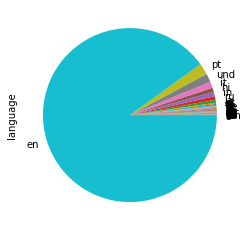

In [51]:
data.language.value_counts().sort_values().plot(kind='pie')

In [52]:
#data.tweet[0]
data['tweet'][1]

"@meatballsubzero Are you pro russia or pro Ukraine ?? I cannot tell, you said you're pro Ukraine and against the invasion but then you're posting stuff like this."

In [53]:
def hashtag_extract(text_list):
    hashtags=[]
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)
    return hashtags
def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})
    # selecting top 15 most frequent hashtags
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()


In [54]:
hashtags = hashtag_extract(data["tweet"])
hashtags = sum(hashtags, [])


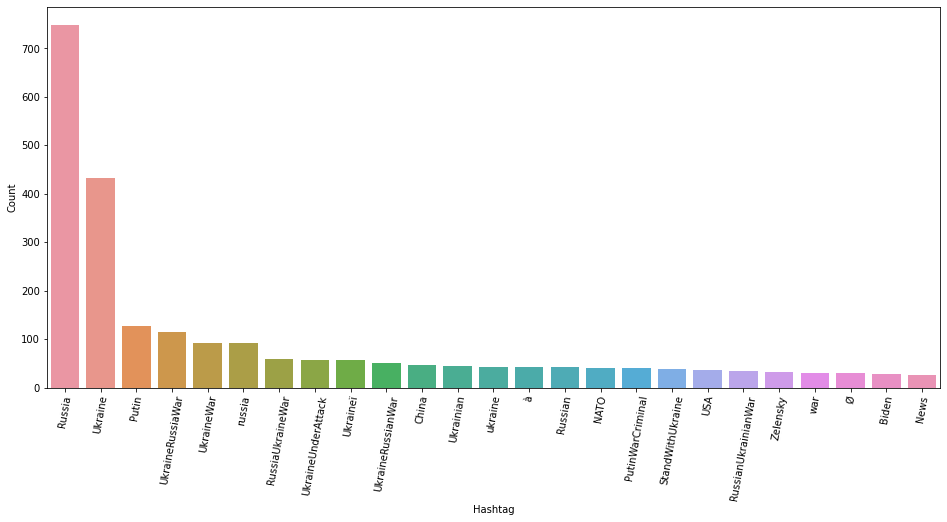

In [55]:
generate_hashtag_freqdist(hashtags)

In [56]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_character = data['total_length_characters'].sum()
print(total_length_character)
count = 0
for text in data['tweet']:
    count+=1
print(count)
average_length = total_length_character/count
print(average_length)

0        130
1        162
2        167
3        220
4         81
        ... 
10009    255
10010     84
10011    176
10012    249
10013    216
Name: total_length_characters, Length: 10014, dtype: int64
1809200
10014
180.66706610744956


In [57]:
data['total_count_words'] = data['tweet'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for words in data['tweet']:
    count+=1
print(count)
average_words = total_words/count
print(average_words)

0        22
1        28
2        26
3        32
4        15
         ..
10009    44
10010    11
10011    32
10012    39
10013    32
Name: total_count_words, Length: 10014, dtype: int64
271703
10014
27.13231475933693


In [58]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

In [59]:
data['total_length_characters'] = data['tweet'].str.len()
print(data['total_length_characters'])
total_length_character = data['total_length_characters'].sum()
print(total_length_character)
count = 0
for text in data['tweet']:
    count+=1
print(count)
average_length = total_length_character/count
print(average_length)

0         64
1         98
2        121
3        134
4         63
        ... 
10009    126
10010     74
10011    115
10012    130
10013    137
Name: total_length_characters, Length: 10014, dtype: int64
1151855
10014
115.02446574795286


In [60]:
data['total_count_words'] = data['tweet'].str.split().str.len()
print(data['total_count_words'])
total_words = data['total_count_words'].sum()
print(total_words)
count = 0
for words in data['tweet']:
    count+=1
print(count)
average_words = total_words/count
print(average_words)

0         9
1        16
2        19
3        19
4        11
         ..
10009    20
10010    10
10011    19
10012    20
10013    18
Name: total_count_words, Length: 10014, dtype: int64
163755
10014
16.35260635110845


In [61]:
from textblob import TextBlob    

In [62]:
def analyse_sentiment(tweet):
    analysis= TextBlob(clean(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity ==0:
        return 0
    else:
        return -1

In [63]:
data['Sentiment']= data['tweet'].apply(lambda x: analyse_sentiment(x))
data['Source'] = 'random user'
data['Length'] = data['tweet'].apply(len)
data['Word_counts'] = data['tweet'].apply(lambda x: len(str(x).split()))

In [64]:
new_data = data[['tweet','retweets_count', 'Sentiment', 'Source','Length','Word_counts']]

In [65]:
new_data.head(5)

,tweet,retweets_count,Sentiment,Source,Length,Word_counts
0,peterschiff padaprabu would shit pant chang n...,0,-1,random user,64,9
1,meatballsubzero pro russia pro ukrain cannot ...,0,0,random user,98,16
2,subway pleas stop busi russia everi dollar sp...,0,1,random user,121,19
3,russia prepar econom crisi develop expert nata...,0,0,random user,134,19
4,bw putin fake news ðÿ“° rubl trash ðÿ— russia...,0,-1,random user,63,11


In [69]:
new_data['Clean tweet'] = new_data['tweet'].apply(lambda x: clean(x))

C:\Users\gopinath\AppData\Local\Temp\ipykernel_6380\893644988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Clean tweet'] = new_data['tweet'].apply(lambda x: clean(x))


In [70]:
new_data[['Clean tweet','Sentiment']].iloc[100]

Clean tweet    ewarren war russia putin peopl wef go peopl la...
Sentiment                                                      0
Name: 100, dtype: object

In [71]:
sentiment = new_data['Sentiment'].value_counts()
sentiment

 0    5094
 1    2788
-1    2132
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

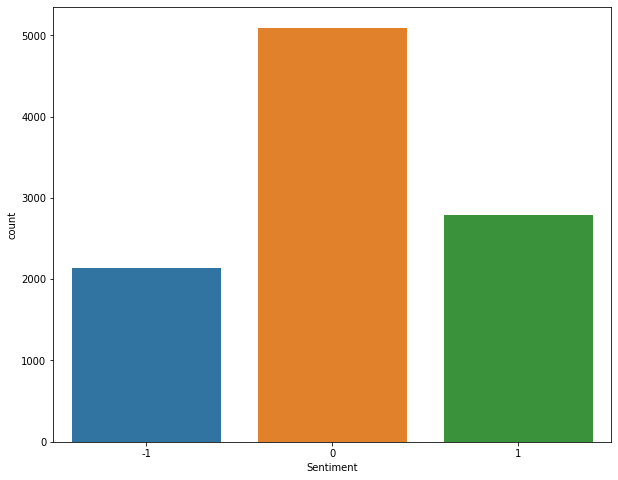

In [72]:
plt.figure(figsize=(10,8))
sns.countplot(data=new_data,x = 'Sentiment')

In [74]:
sizes = [count for count in new_data['Sentiment'].value_counts()]
print(sizes)

[5094, 2788, 2132]


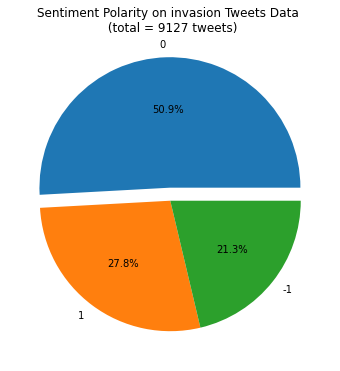

In [75]:
fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in new_data['Sentiment'].value_counts()]
labels = list(data['Sentiment'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode)
ax.set_title('Sentiment Polarity on invasion Tweets Data \n (total = 9127 tweets)')
plt.show()


In [81]:
neutral = new_data[new_data['Sentiment'] == 0]
positive = new_data[new_data['Sentiment'] == 1]
negative = new_data[new_data['Sentiment'] == -1]

In [82]:
negative.iloc[1]

tweet             bw putin fake news ðÿ“° rubl trash ðÿ—  russia...
retweets_count                                                    0
Sentiment                                                        -1
Source                                                  random user
Length                                                           63
Word_counts                                                      11
Clean tweet       bw putin fake news ðÿ“° rubl trash ðÿ—  russia...
Name: 4, dtype: object

In [84]:
#neutral_text
print("Neutral tweet example :",neutral['tweet'].values[37])
# Positive tweet
print("Positive Tweet example :",positive['tweet'].values[37])
#negative_text
print("Negative Tweet example :",negative['tweet'].values[1])

Neutral tweet example : petestrzok  theseamerican oligarch would like unit state like russia
Positive Tweet example : new post media israeliani russia aperta idea di negoziati gerusalemm â€“   
Negative Tweet example : bw putin fake news ðÿ“° rubl trash ðÿ—  russia histori ðÿ'‹ðÿ½


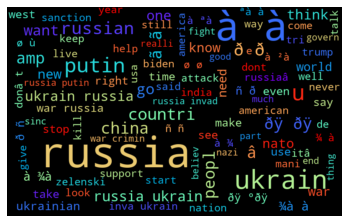

In [96]:
txt = ' '.join(text for text in new_data['Clean tweet'])
wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 800,
            height = 500,
            colormap = 'rainbow'
            ).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

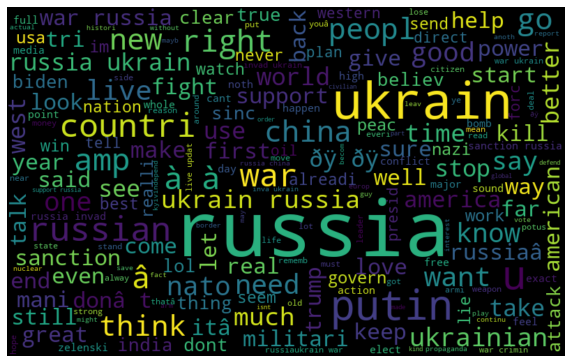

In [117]:
positive_words =' '.join([text for text in new_data['Clean tweet'][new_data['Sentiment'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [107]:
new_data[['Clean tweet','Sentiment']][new_data['Sentiment']==1]

,Clean tweet,Sentiment
2,subway plea stop busi russia everi dollar spe...,1
16,sanction work need global teamwork china want ...,1
20,gregourt sevssupersquad ysxsh threaten exact ...,1
34,russia tri free peopl ds mani peopl dont know...,1
35,kremlinrussia order stop negat electromagnet ...,1
...,...,...
9999,live updat ukrain russia continu talk overâ vi...,1
10001,recal certain leader anoth countri use phrase ...,1
10004,russia replac shutter mcdonaldâ€™ restaur cop...,1
10005,berkleybearnew wow imagin whole world sanctio...,1


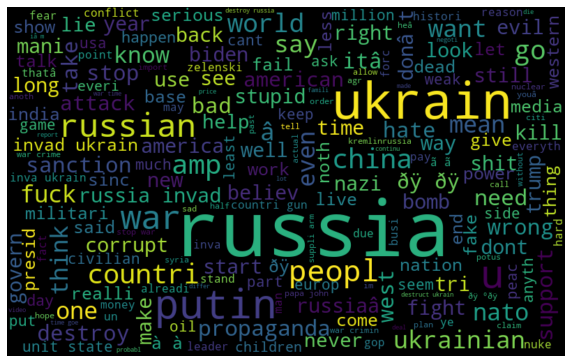

In [118]:
negative_words =' '.join([text for text in new_data['Clean tweet'][new_data['Sentiment'] == -1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

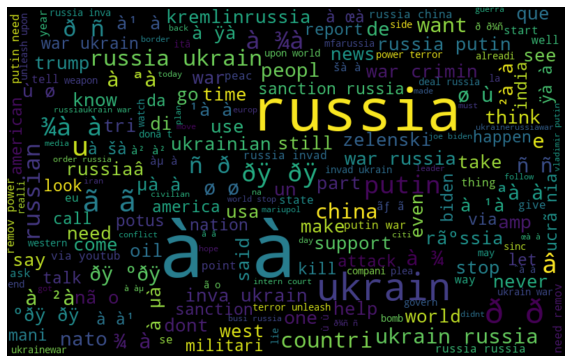

In [119]:
neutral_words =' '.join([text for text in new_data['Clean tweet'][new_data['Sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()